# Practica 8, KNN

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Utilizamos NearestNeighbors para obtener los vecinos más cercanos
from sklearn.neighbors import NearestNeighbors

## Ej 1: Implementar un clasificador de k-NN que prediga el sexo de los pinguinos utilizando como variables a el largo del pico y el largo de la aleta. Hacerlo para diferentes valores de k (impares) y evaluar el error de predicci´on en cada caso. ¿Como elegiria el valor de k optimo?

### Parte 1) Implementando desde 0

In [2]:
# Eliminamos datos faltantes y reseteamos los índices, para no tener problemas al graficar
penguins = sns.load_dataset("penguins").dropna().reset_index(drop=True)

# Normalizamos las variables "bill_length_mm" y "bill_depth_mm" por MinMax
penguins[["bill_length_mm", "bill_depth_mm"]] = MinMaxScaler().fit_transform(penguins[["bill_length_mm", "bill_depth_mm"]])

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,181.0,3750.0,Male
1,Adelie,Torgersen,0.269091,0.511905,186.0,3800.0,Female
2,Adelie,Torgersen,0.298182,0.583333,195.0,3250.0,Female
3,Adelie,Torgersen,0.167273,0.738095,193.0,3450.0,Female
4,Adelie,Torgersen,0.261818,0.892857,190.0,3650.0,Male


In [3]:
# Queremos usar las variables "bill_length_mm" y "flipper_length_mm" para predecir el sexo.

datos = penguins[["bill_depth_mm", "flipper_length_mm"]]
datos

,bill_depth_mm,flipper_length_mm
0,0.666667,181.0
1,0.511905,186.0
2,0.583333,195.0
3,0.738095,193.0
4,0.892857,190.0
...,...,...
328,0.071429,214.0
329,0.142857,215.0
330,0.309524,222.0
331,0.202381,212.0


In [4]:
# Ahora busquemos los k venicos mas cercanos del pinguino
# En este caso tiramos un k = 3 cercanos
k = 3
ind = 100
neighbors = NearestNeighbors(n_neighbors = k+1)
neighbors.fit(datos)

# Ahora podemos buscar los vecinos más cercanos a un punto cualquiera o un conjunto de puntos.
# Tenemos que pasarle un DataFrame

distances, indices = neighbors.kneighbors(datos.iloc[[ind]])

In [5]:
# Nos devuelve un vector de distancias
distances.flatten()

array([0.        , 0.04761905, 0.0952381 , 0.1547619 ])

In [6]:
# Y un vector de índices
indices.flatten()

array([100, 181, 196, 127])

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

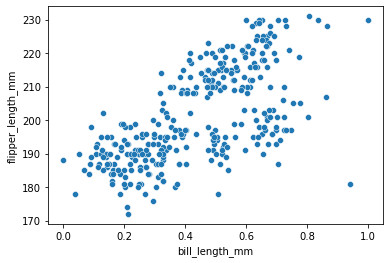

In [7]:
# Grafiquemos

sns.scatterplot(data = penguins, x = "bill_length_mm", y = "flipper_length_mm")

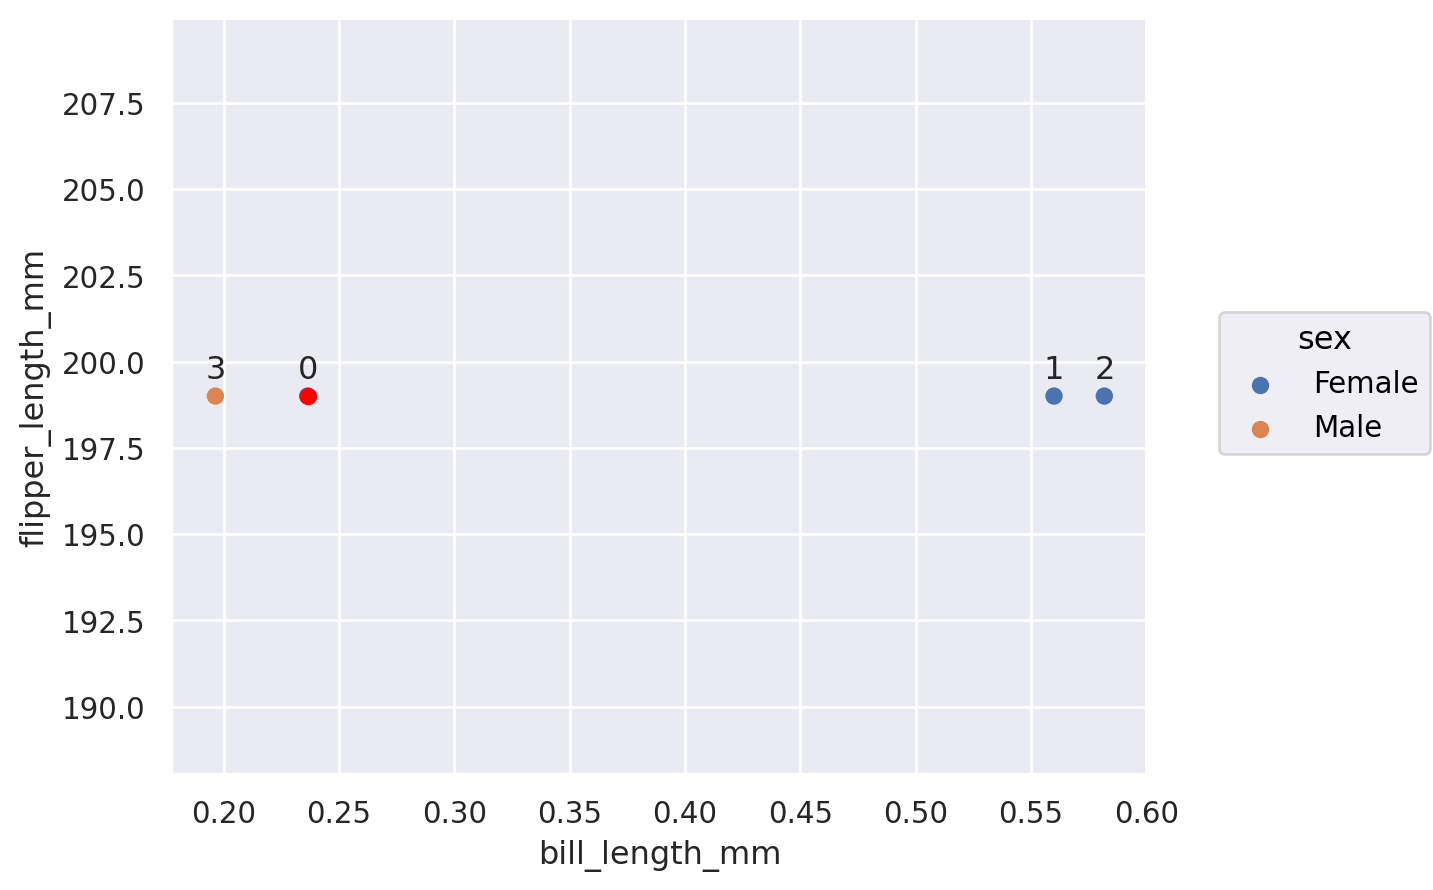

In [8]:
# Graficamos
(
    so.Plot(data = penguins.iloc[indices.flatten()], x = "bill_length_mm", y = "flipper_length_mm",  text = np.arange(k+1).astype(str))
    .add(so.Text(valign = "bottom"))
    .add(so.Dot(), color = "sex")
    .add(so.Dot(color = "red"), data = penguins.iloc[[ind]], x = "bill_length_mm", y = "flipper_length_mm")
)

Por ej en este caso, nuestro punto 0 tiene mas chances de ser femenino que masculino.

### Parte 2) Implementando para todo punto

Ahora predigamos el sexo de los pinguinos para todo punto en el dataset

In [9]:
# Cargamos el comando mode
import statistics
from statistics import mode

In [10]:
# Separo en X e y la variable respuesta y la variable explicativa.
X = penguins[["bill_length_mm", "flipper_length_mm"]]
y = penguins["sex"]

In [11]:
# Escalo X a valores entre 0 y 1
X = MinMaxScaler().set_output(transform="pandas").fit_transform(X)
X

,bill_length_mm,flipper_length_mm
0,0.254545,0.152542
1,0.269091,0.237288
2,0.298182,0.389831
3,0.167273,0.355932
4,0.261818,0.305085
...,...,...
328,0.549091,0.711864
329,0.534545,0.728814
330,0.665455,0.847458
331,0.476364,0.677966


In [12]:
from sklearn.model_selection import train_test_split

# Separo en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier


neighbor = KNeighborsClassifier(n_neighbors=5)
# Entrenamos utilizando X_train
neighbor.fit(X_train,y_train)

# entrenamos el modelo con k = 3 en este caso
neighbors = NearestNeighbors(n_neighbors = k)
neighbors.fit(X_train, y_train)

NearestNeighbors(n_neighbors=3)

In [14]:
# Predecimos utilizando X_test
y_pred = neighbor.predict(X_test)
y_pred

array(['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female'], dtype=object)

In [15]:
from sklearn.metrics import accuracy_score

# Calculamos la precisión con accuracy_score
print(accuracy_score(y_test,y_pred))

0.7611940298507462


Bastante malucho un 76%

In [16]:
# Repetimos todo para varios valores de K
for K in range(1,30,2):
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X_train,y_train)
    y_pred = neighbor.predict(X_test)
    print(K, accuracy_score(y_test,y_pred))

1 0.746268656716418
3 0.746268656716418
5 0.7611940298507462
7 0.7761194029850746
9 0.7761194029850746
11 0.7611940298507462
13 0.7611940298507462
15 0.7611940298507462
17 0.7910447761194029
19 0.7611940298507462
21 0.746268656716418
23 0.7761194029850746
25 0.7761194029850746
27 0.8059701492537313
29 0.8059701492537313


Vemos que ya en 27 neighbors obtenemos un porcentaje razonable de prediccion

---

Recordemos que:

**Matriz de confusión**
La matriz de confusión $C$ guarda en la coordenada $C_{ij}$ la cantidad de observaciones en el grupo $i$ que fueron clasificadas en el grupo $j$.

Si la variable es binaria:
- $C_{00}$ son los casos negativos clasificados correctamente.
- $C_{01}$ son los casos negativos  clasificados como positivos (falsos positivos).
- $C_{10}$ son los casos positivos  clasificados como negativos (falsos negativos).
- $C_{11}$ son los casos positivos clasificados correctamente.

In [17]:
K = 27
neighbor = KNeighborsClassifier(n_neighbors=K)
neighbor.fit(X_train,y_train)
y_pred = neighbor.predict(X_test)

In [18]:
print(y_test.size)
print(y_pred.size)

67
67


In [39]:
X_test

,bill_length_mm,flipper_length_mm
25,0.269091,0.101695
309,0.538182,0.847458
73,0.363636,0.389831
195,0.643636,0.440678
57,0.327273,0.338983
...,...,...
280,0.414545,0.813559
3,0.167273,0.355932
77,0.109091,0.355932
311,0.690909,0.898305


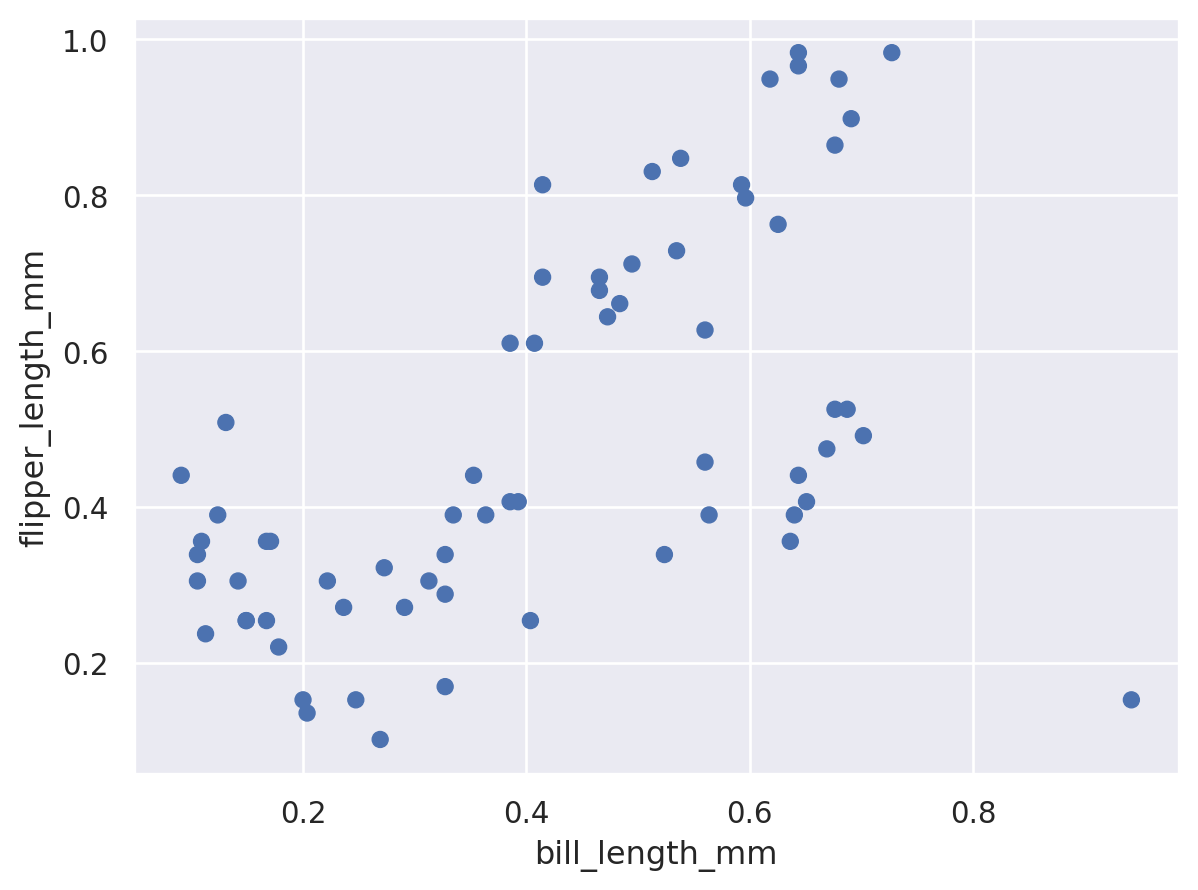

In [40]:
# Graficamos los resultados
(
    so.Plot(data = X_test, x = "bill_length_mm", y = "flipper_length_mm")
    .add(so.Dot(), color = y_pred)
)


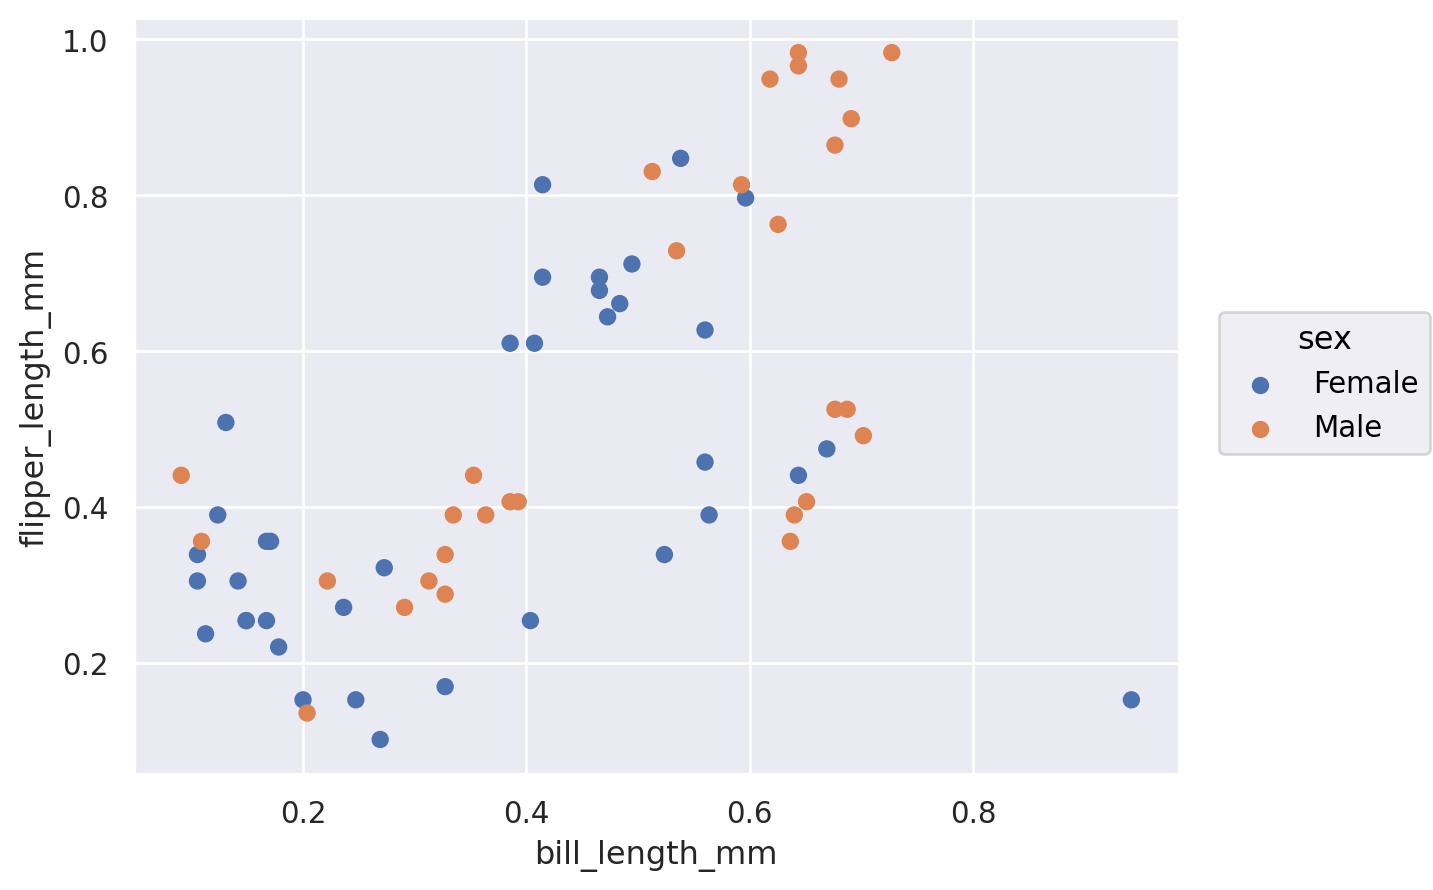

In [35]:
# Comparemos con el original
(
    so.Plot(data = X_test, x = "bill_length_mm", y = "flipper_length_mm")
    .add(so.Text(valign = "bottom"))
    .add(so.Dot(), color = y_test)
)

In [21]:
pd.DataFrame(y_pred).value_counts()

Female    34
Male      33
dtype: int64

In [22]:
# Cuento los machos y hembras
print("y_test: \n",y_test.value_counts(), "\n")
print("y_pred: \n", pd.DataFrame(y_pred).value_counts())

y_test: 
 Female    37
Male      30
Name: sex, dtype: int64 

y_pred: 
 Female    34
Male      33
dtype: int64


In [23]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test,y_pred)
display(C)

array([[29,  8],
       [ 5, 25]])

Lo que muestra la matriz de confusion es que:

- De 37 females, reconocimos 29 como hembras y 8 como machos.
- De 30 males, reconocimos 5 como hembras y 25 como machos.


### FIX: Pareciera que predecimos una gran porcion, lo que no entiendo es por que no se grafican bien los resultados

## Ej 2: Implementar un clasificador de k-NN que prediga la especie de los pinguinos. Pueden elegir las variables. ¿Con cuales variables obtienen mejores resultados?


Reportar los resultados con visualizaciones adecuadas

In [24]:
# Vamos a buscar las variables mas adecuadas para predecir la especie
penguins2 = penguins.copy()

# Separamos las variables categoricas
penguins2 = pd.get_dummies(penguins2, dtype=float)

penguins2.corr()["species_Adelie"].sort_values(ascending=False)


species_Adelie       1.000000
bill_depth_mm        0.531342
island_Torgersen     0.458786
island_Dream         0.013443
sex_Female           0.007961
sex_Male            -0.007961
island_Biscoe       -0.332518
species_Chinstrap   -0.447597
body_mass_g         -0.550479
species_Gentoo      -0.658904
flipper_length_mm   -0.685947
bill_length_mm      -0.836409
Name: species_Adelie, dtype: float64

In [25]:
penguins2.corr()["species_Gentoo"].sort_values(ascending=False)

species_Gentoo       1.000000
flipper_length_mm    0.866854
body_mass_g          0.821178
island_Biscoe        0.761548
bill_length_mm       0.488256
sex_Male             0.012082
sex_Female          -0.012082
island_Torgersen    -0.302296
species_Chinstrap   -0.377744
island_Dream        -0.570702
species_Adelie      -0.658904
bill_depth_mm       -0.822293
Name: species_Gentoo, dtype: float64

In [26]:
penguins2.corr()["species_Chinstrap"].sort_values(ascending=False)

species_Chinstrap    1.000000
island_Dream         0.661894
bill_length_mm       0.449098
bill_depth_mm        0.323505
sex_Female           0.004564
sex_Male            -0.004564
flipper_length_mm   -0.186175
island_Torgersen    -0.205351
body_mass_g         -0.298622
species_Gentoo      -0.377744
species_Adelie      -0.447597
island_Biscoe       -0.496022
Name: species_Chinstrap, dtype: float64

Viendo la matriz de correlacion de cada variable categorica de "especie" por separado notamos que las 2 variables que mejor predicen son:
- flipper_length_mm (0.866854)
- body_mass_g (0.821178)

El resto es menor o son variables categoricas, en donde mejor no me meto por las dudas

In [27]:
# Hagamos el KNN

# Elijo las variables mas correlacionadas con la especie
X2 = penguins[["flipper_length_mm", "body_mass_g"]]
y2 = penguins["species"]

# Escalo X a valores entre 0 y 1
X2 = MinMaxScaler().set_output(transform="pandas").fit_transform(X2)
X2

# Separo en train y test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

# Repetimos todo para varios valores de K
neighbor = KNeighborsClassifier(n_neighbors=5)
# Entrenamos utilizando X2_train
neighbor.fit(X2_train,y2_train)

# entrenamos el modelo con k = 3 en este caso
k = 3
neighbors = NearestNeighbors(n_neighbors = k)
neighbors.fit(X2_train, y2_train)


NearestNeighbors(n_neighbors=3)

In [28]:
# Predecimos utilizando X_test
y2_pred = neighbor.predict(X2_test)
y2_pred

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie'], dtype=object)

In [29]:
# Calculamos la precisión con accuracy_score
print(accuracy_score(y2_test,y2_pred))

0.8507462686567164


Nada mal

---

In [30]:
# Repetimos todo para varios valores de K
for K in range(1,30,2):
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X2_train,y2_train)
    y_pred = neighbor.predict(X2_test)
    print(K, accuracy_score(y2_test,y2_pred))

1 0.8507462686567164
3 0.8507462686567164
5 0.8507462686567164
7 0.8507462686567164
9 0.8507462686567164
11 0.8507462686567164
13 0.8507462686567164
15 0.8507462686567164
17 0.8507462686567164
19 0.8507462686567164
21 0.8507462686567164
23 0.8507462686567164
25 0.8507462686567164
27 0.8507462686567164
29 0.8507462686567164


Ni cambia dependiendo del k, asique por optimizacion tomamos k = 1

In [31]:
K = 1
neighbor = KNeighborsClassifier(n_neighbors=K)
neighbor.fit(X2_train,y2_train)
y2_pred = neighbor.predict(X2_test)

### FIX: lo mismo en este ejercicio

nota: y2_pred es un np.array (capaz ayuda eso?)

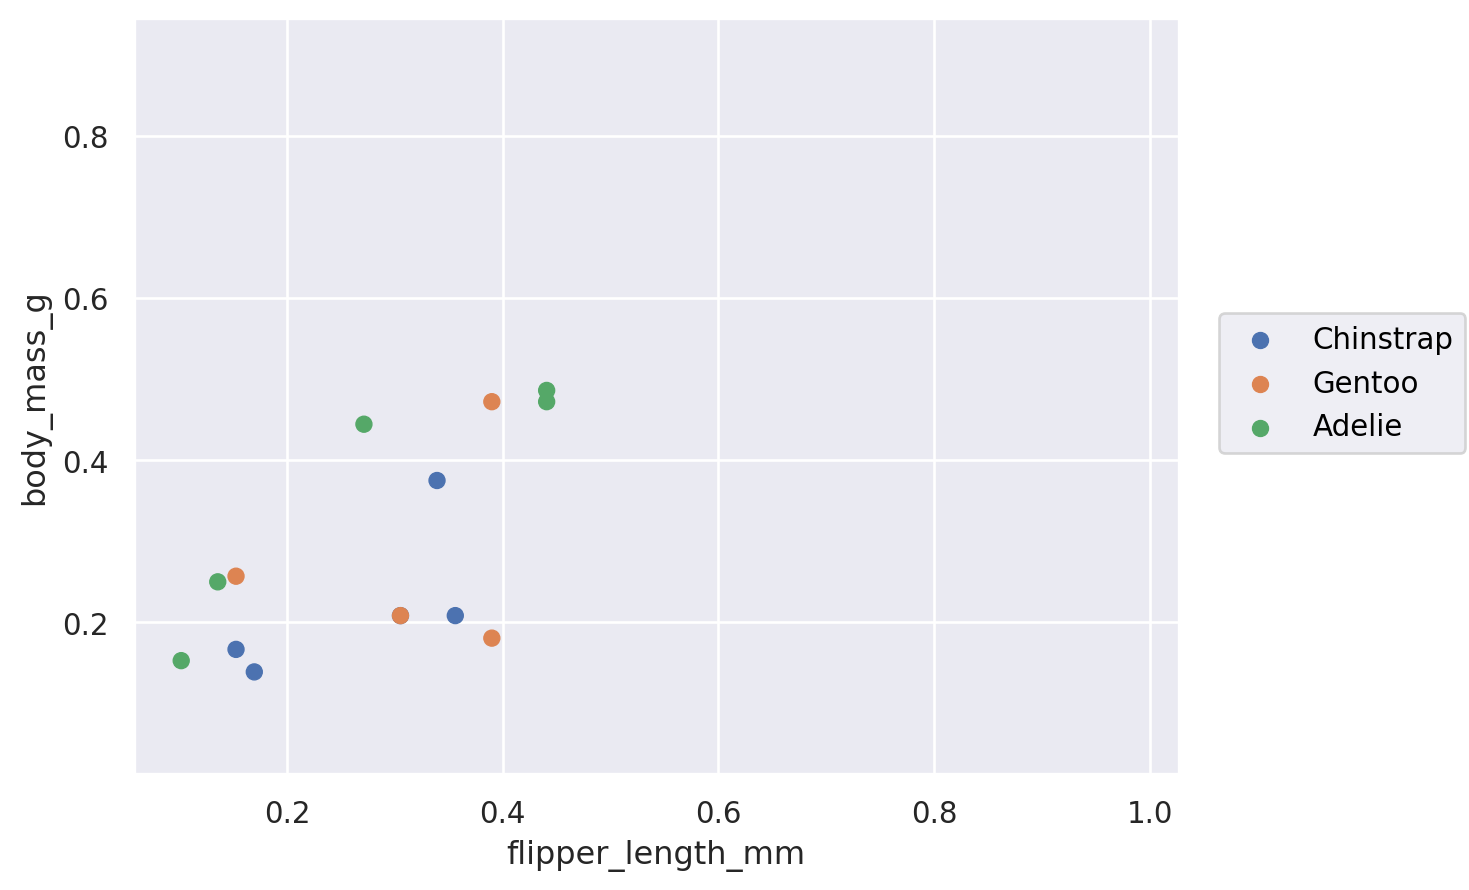

In [32]:
# Graficamos los resultados
(
    so.Plot(data = X2_test, x = "flipper_length_mm", y = "body_mass_g")
    .add(so.Text(valign = "bottom"))
    .add(so.Dot(), color = y2_pred)
)

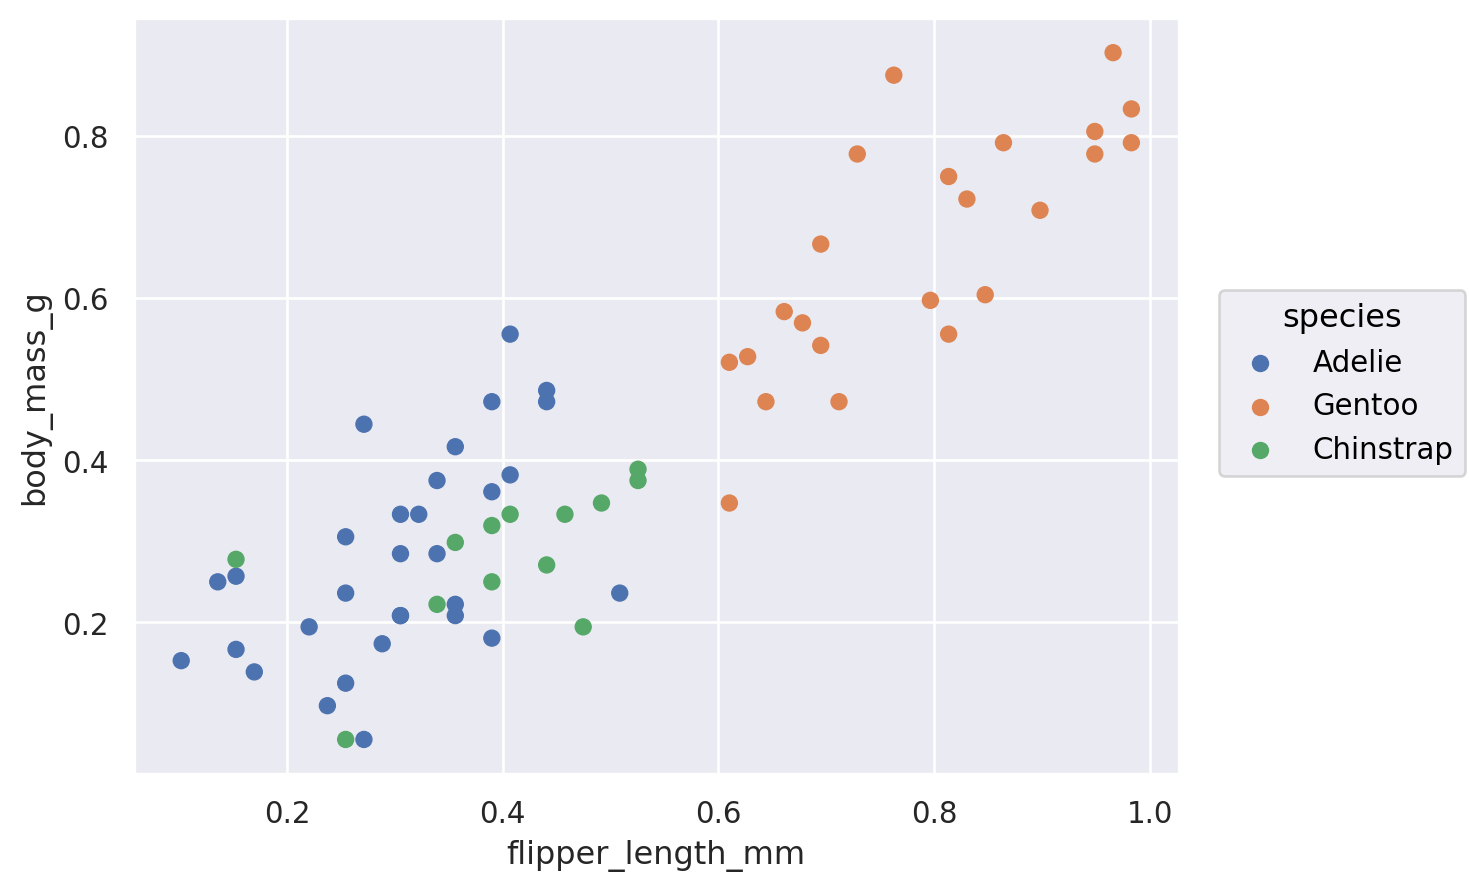

In [33]:
# Comparemos con el original
(
    so.Plot(data = X2_test, x = "flipper_length_mm", y = "body_mass_g")
    .add(so.Text(valign = "bottom"))
    .add(so.Dot(), color = y2_test)
)

In [34]:
# Veamos la matriz de confusion
C = confusion_matrix(y2_test,y2_pred)
C

array([[24,  7,  0],
       [ 7,  6,  0],
       [ 0,  2, 21]])

Le erramos a los que no estan en la diagonal, es decir a 7+7+2 = 16 especies